In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
for category in range(4):
    images = [img_to_array(load_img(f'/content/drive/My Drive/Myocardial Infraction CNN/{category}/{file}', color_mode='grayscale', target_size=(360, 480))) for file in os.listdir(f'/content/drive/My Drive/Myocardial Infraction CNN/{category}')]

    labels = [category] * len(images)

    train_images_category, test_images_category, train_labels_category, test_labels_category = train_test_split(images, labels, test_size=0.2)

    train_images.extend(train_images_category)
    test_images.extend(test_images_category)
    train_labels.extend(train_labels_category)
    test_labels.extend(test_labels_category)

In [ ]:
x_train = np.array(train_images)
x_test = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
print(x_train.shape[1])

360


CNN

In [ ]:
start_time = time.time()


In [ ]:
cnn_model = tf.keras.Sequential([
    layers.Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 480, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 180, 240, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 240, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 90, 120, 32)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 345600)            0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:

history = cnn_model.fit(x_train, train_labels, epochs=100, validation_data=(x_test, test_labels))

Epoch 1/100
24/24 [==============================] - 13s 74ms/step - loss: 6.4787 - accuracy: 0.2551 - val_loss: 1.3856 - val_accuracy: 0.1872
Epoch 2/100
24/24 [==============================] - 1s 43ms/step - loss: 1.3793 - accuracy: 0.3063 - val_loss: 1.3724 - val_accuracy: 0.3690
Epoch 3/100
24/24 [==============================] - 1s 42ms/step - loss: 1.3687 - accuracy: 0.3009 - val_loss: 1.3605 - val_accuracy: 0.3048
Epoch 4/100
24/24 [==============================] - 1s 41ms/step - loss: 1.3248 - accuracy: 0.3698 - val_loss: 1.2913 - val_accuracy: 0.3636
Epoch 5/100
24/24 [==============================] - 1s 52ms/step - loss: 1.1771 - accuracy: 0.5047 - val_loss: 1.0206 - val_accuracy: 0.6043
Epoch 6/100
24/24 [==============================] - 1s 48ms/step - loss: 0.7223 - accuracy: 0.8111 - val_loss: 0.6986 - val_accuracy: 0.6898
Epoch 7/100
24/24 [==============================] - 1s 47ms/step - loss: 0.2757 - accuracy: 0.9244 - val_loss: 0.3469 - val_accuracy: 0.8396
Epoch

6/6 [==============================] - 0s 21ms/step - loss: 111.1478 - accuracy: 0.9198


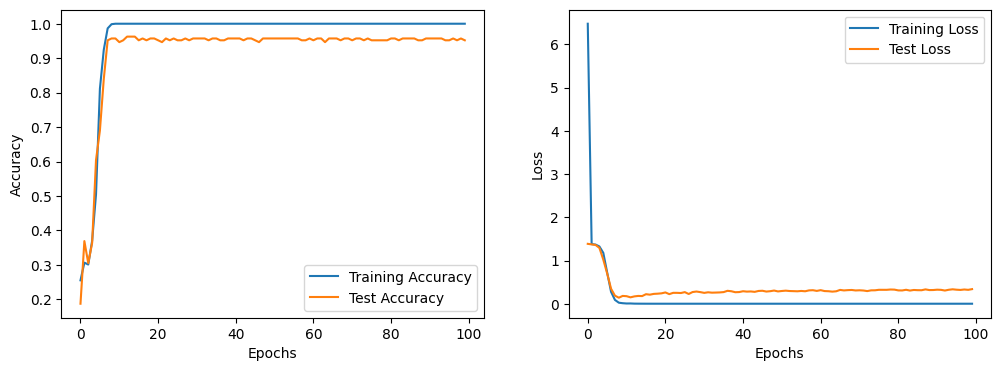

In [ ]:
test_loss, test_acc = cnn_model.evaluate(np.array(test_images), np.array(test_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions = cnn_model.predict(np.array(test_images))
binary_predictions = np.argmax(predictions, axis=1)
test_labels = test_labels.reshape(-1, 1)
conf_matrix = confusion_matrix(test_labels, binary_predictions)


6/6 [==============================] - 0s 19ms/step


In [ ]:
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


num_classes = len(conf_matrix)
specificity = []
for i in range(num_classes):
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_class = true_negatives / (true_negatives + false_positives)
    specificity.append(specificity_class)

average_specificity = np.mean(specificity)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity for each class: {specificity}")
print(f"Average Specificity: {average_specificity}")

Confusion Matrix:
[[48  0  0  0]
 [ 1 32  3 11]
 [ 0  0 35  0]
 [ 0  0  0 57]]
Accuracy: 0.9198
Precision: [0.97959184 1.         0.92105263 0.83823529]
Recall: [1.         0.68085106 1.         1.        ]
F1 Score: [0.98969072 0.81012658 0.95890411 0.912     ]
Specificity for each class: [0.9928057553956835, 1.0, 0.9802631578947368, 0.9153846153846154]
Average Specificity: 0.9721133821687589


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training took {elapsed_time} seconds.")

Training took 149.60450172424316 seconds.
